In [14]:
import rl.environments
from os.path import join
from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv
import yaml, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = pathlib.Path().absolute()

to_combine=[
    ['AbstractConveyor1','20201216_1300'],
    ['AbstractConveyor1', '20201214_1000'],
    ['AbstractConveyor1','20201216_1330'],
    ['AbstractConveyor1','20201216_2200'],
    ['AbstractConveyor1','20201216_2230'],
    ['AbstractConveyor1','20201216_2300']
    
]

In [15]:
env1, subdir = to_combine[0]
episodes = 100
combinations = ['1x2', '2x2', '2x3', '3x3', '4x3', '5x3']

results = {}
for idx, combination in enumerate(to_combine):
    env1, subdir = combination
    # load config and variables needed
    location_path= join(path, 'rl', 'trained_models', env1, subdir)
    with open(join(location_path, 'config.yml'), 'r') as c:
        config = yaml.load(c)
        print('\nLoaded config file from: {}\n'.format(join(location_path, 'config.yml')))
    model_config = config['models']['PPO2']

    #initialize env with the config file
    env_obj = getattr(rl.environments, env1)
    env = env_obj(config)

    # load best model from path
    model = PPO2.load(join(location_path, 'model.zip'), env=DummyVecEnv([lambda: env]))


    results[combinations[idx]] = {}
    results[combinations[idx]]['idle_time'] = 0
    results[combinations[idx]]['cycle_count'] = 0
    results[combinations[idx]]['steps'] = 0

    for episode in range(episodes):
        # Run an episode
        state = env.reset()
        done = False
        while not done:
            action, _ = model.predict(state, deterministic=False)
            state, reward, done, tc = env.step(action)
        results[combinations[idx]]['idle_time'] += sum(env.idle_times_operator.values())
        results[combinations[idx]]['cycle_count'] += env.cycle_count
        results[combinations[idx]]['steps'] += env.steps
    results[combinations[idx]]['idle_time'] = results[combinations[idx]]['idle_time'] / episodes
    results[combinations[idx]]['cycle_count'] = results[combinations[idx]]['cycle_count'] /episodes
    results[combinations[idx]]['steps'] = results[combinations[idx]]['steps'] /episodes

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_1300\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201214_1000\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_1330\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2200\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2230\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2300\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]


In [16]:
resultcsv = pd.DataFrame.from_dict(results).T
resultcsv.to_csv('results_DRL.csv')
resultcsv

,idle_time,cycle_count,steps
1x2,0.54,52.91,946.17
2x2,0.63,74.62,1443.61
2x3,44.23,204.09,2517.95
3x3,91.72,539.53,2791.97
4x3,685.78,1007.81,3063.20
5x3,41872.27,3911.78,8826.18


# queue occupation

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_1300\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.6345748962784072 std:  0.2112253295086236


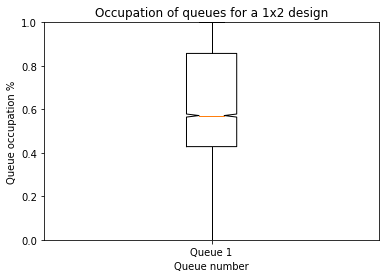

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201214_1000\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.6333501361024296 std:  0.19274038256744042
mean:  0.51324730315556 std:  0.1894728141228255


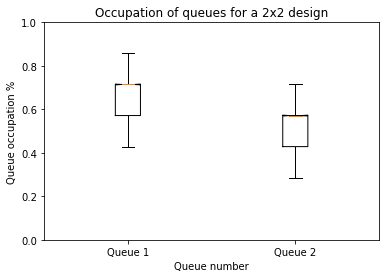

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_1330\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.5592840149541181 std:  0.2190754419563115
mean:  0.45479211510139345 std:  0.23785481033022676


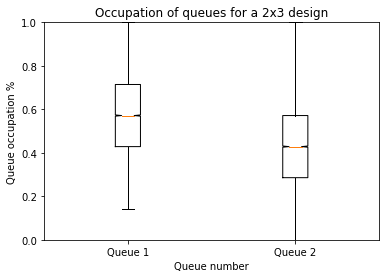

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2200\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.46835777171634563 std:  0.24817007986492257
mean:  0.4391662827951368 std:  0.22986047349926408
mean:  0.47976005010170436 std:  0.23923466241263766


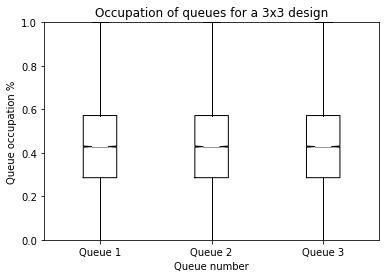

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2230\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.6197454722061118 std:  0.2772998924311761
mean:  0.5945614605877998 std:  0.2772249323614853
mean:  0.33135765445895154 std:  0.2809991429716773
mean:  0.5430664988046907 std:  0.29581391211708336


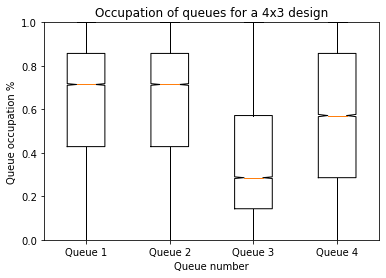

c:\users\_vinc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()



Loaded config file from: D:\Drive\git\RL\rl\trained_models\AbstractConveyor1\20201216_2300\config.yml

Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
Custom MLP architecture [64, 64, {'pi': [], 'vf': []}]
mean:  0.004795811317987161 std:  0.04416820064904598
mean:  0.005701403348777291 std:  0.04876192657714729
mean:  0.01787428214293686 std:  0.09376742930313564
mean:  0.005422391719572585 std:  0.04459643419737339
mean:  0.005247012981215342 std:  0.0457117500026952


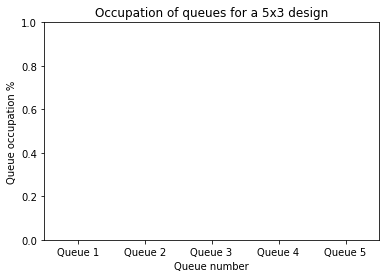

In [17]:
env1, subdir = to_combine[0]
episodes = 10
combinations = ['1x2', '2x2', '2x3', '3x3', '4x3', '5x3']

results = {}
for idx, combination in enumerate(to_combine):
    env1, subdir = combination
    # load config and variables needed
    location_path= join(path, 'rl', 'trained_models', env1, subdir)
    with open(join(location_path, 'config.yml'), 'r') as c:
        config = yaml.load(c)
        print('\nLoaded config file from: {}\n'.format(join(location_path, 'config.yml')))
    model_config = config['models']['PPO2']

    #initialize env with the config file
    env_obj = getattr(rl.environments, env1)
    env = env_obj(config)

    # load best model from path
    model = PPO2.load(join(location_path, 'model.zip'), env=DummyVecEnv([lambda: env]))




    log_data=[]
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action, _ = model.predict(state, deterministic=False)
            state, reward, done, tc = env.step(action)
            log_data.append(env.len_queues)
    log_dataframe = pd.DataFrame(np.array(log_data)).reset_index()
    for i in range(env.amount_of_gtps):
        print('mean: ', log_dataframe[i].mean(), 'std: ', log_dataframe[i].std())

    labels = ['Queue 1', 'Queue 2', 'Queue 3', 'Queue 4', 'Queue 5']
    plt.boxplot([log_dataframe[i] for i in range(env.amount_of_gtps)], notch=True, labels=[label for label in labels][:env.amount_of_gtps], showfliers=False)
    plt.ylim(0,1)
    plt.ylabel('Queue occupation %')
    plt.xlabel('Queue number')
    plt.title('Occupation of queues for a {}x{} design'.format(env.amount_of_gtps, env.amount_of_outputs))
    plt.savefig('figures/box_rl_queues_{}x{}.png'.format(env.amount_of_gtps, env.amount_of_outputs))
    plt.show()
  

In [18]:
log_dataframe

,index,0,1,2,3,4
0,0,0.571429,0.285714,0.285714,0.428571,0.285714
1,1,0.571429,0.285714,0.285714,0.428571,0.285714
2,2,0.571429,0.428571,0.285714,0.428571,0.285714
3,3,0.571429,0.428571,0.428571,0.428571,0.285714
4,4,0.571429,0.428571,0.428571,0.428571,0.285714
...,...,...,...,...,...,...
89597,89597,0.000000,0.000000,0.000000,0.000000,0.000000
89598,89598,0.000000,0.000000,0.000000,0.000000,0.000000
89599,89599,0.000000,0.000000,0.000000,0.000000,0.000000
89600,89600,0.000000,0.000000,0.000000,0.000000,0.000000
